In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [74]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([ 0.69872366,  0.75176984]), array([ 0.25997411,  0.14504062])]
[array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]]), array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]])]


Solution
===

In [92]:
def compute_log_p(X, mean, sigma):
    x = np.zeros(len(X))
    f = ((2*np.pi) ** (len(mean)/2) * np.sqrt(np.linalg.det(sigma)))
    for i, n in enumerate(X):
        p = np.exp(-.5*(n-mean).T.dot(np.linalg.inv(sigma)).dot((n-mean)))
        print(p.__type)
        x[i] = 1/f * p
    return n

In [93]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]
print(log_ps)
# exercise: try to do this without looping

[array([ 0.6303722 ,  0.97248392]), array([ 0.6303722 ,  0.97248392])]


In [86]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0]


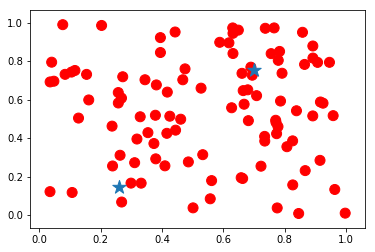

In [87]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()